In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request

searchKey = input('검색 키워드 입력:')

driver = webdriver.Chrome()
#driver = driver.replace("https", "http")
driver.get("https://www.google.com/search?sca_esv=600376160&sxsrf=ACQVn0-WLLPow4x9Ghg1JUxUoLMNLexj9w:1705920068904&q=%EC%B9%98%ED%82%A8&tbm=isch&source=lnms&sa=X&sqi=2&ved=2ahUKEwjzj-O95_CDAxXLl1YBHQPaBHIQ0pQJegQICxAB&biw=1605&bih=892&dpr=2")
#driver = driver.replace("https", "http")
elem = driver.find_element("name", "q")

elem.send_keys(searchKey)
elem.send_keys(Keys.RETURN)

SCROLL_PAUSE_TIME = 1
# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
        except:
            break
    last_height = new_height

images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
count = 1
for image in images:
    try:
        image.click()
        time.sleep(0.5)
        
        imgUrl  = driver.find_element(By.XPATH,
                '//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute(
                "src") 
        #//*[@id="islrg"]/div[1]/div[1]/a[1]/div[1]/img
        #/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[3]/a[1]/div[1]/img


        opener = urllib.request.build_opener()
        opener.addheaders = [
            ('User-Agent',
             'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
        ]
        urllib.request.install_opener(opener)
        urllib.request.urlretrieve(imgUrl, f'./img/{searchKey}{str(count)}.jpg')
        count = count + 1
    except Exception as e:
        print('e : ', e)
        pass

driver.close()

https://i.namu.wiki/i/3u7KQ8jVXWJMJpioMNBo5bFb7NrMd1jUbJrGXy99vSgh57D2w0BHG3RlEnawqyRlfAuTihp37sPnlCKX3IlKNg.webp
https://m.08food.com/web/product/big/201801/31_shop1_635950.jpg
https://m.cj.co.kr/images/theKitchen/PHON/0000001651/0000006094/0000001651.jpg
https://img.cjthemarket.com/images/file/product/612/20220518152441413.jpg?SF=webp
https://ssarijai.hgodo.com/5920/001.jpg
https://recipe1.ezmember.co.kr/cache/recipe/2016/05/11/05f9a5568d7e4862f3dcb5e59a186bbf1.jpg
https://img.cjthemarket.com/images/file/product/788/20220603134943581.jpg
Error:  Message: element click intercepted: Element  is not clickable at point (145, 633). Other element would receive the click: <div jsname="r5xl4" class="islrc" role="list" style="width: 551px;">...</div>
  (Session info: chrome=120.0.6099.225)
Stacktrace:
	GetHandleVerifier [0x00007FF6CB912142+3514994]
	(No symbol) [0x00007FF6CB530CE2]
	(No symbol) [0x00007FF6CB3D76AA]
	(No symbol) [0x00007FF6CB4288F3]
	(No symbol) [0x00007FF6CB4268ED]
	(No symbo
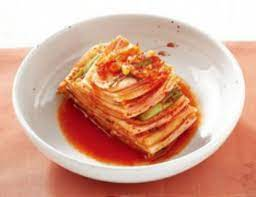
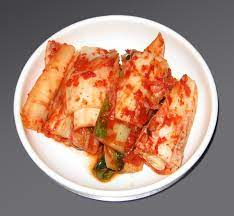
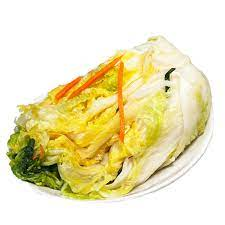
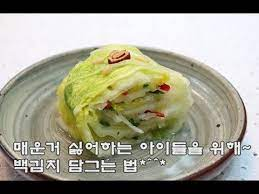
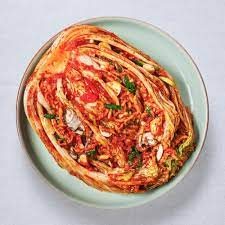
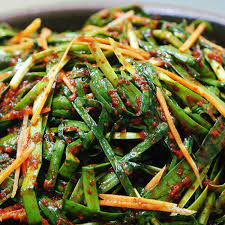
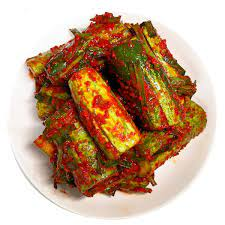
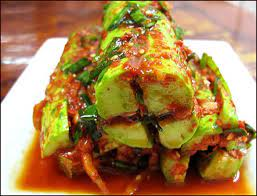
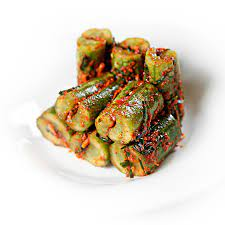
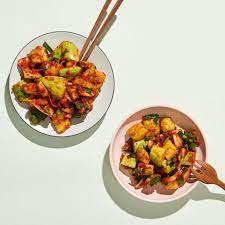
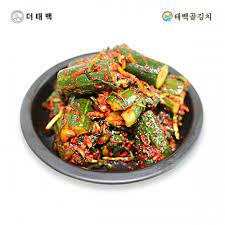
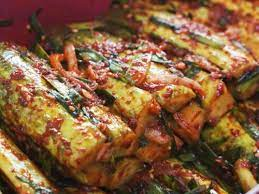
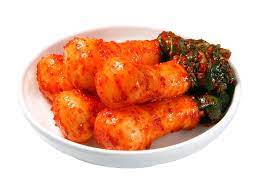
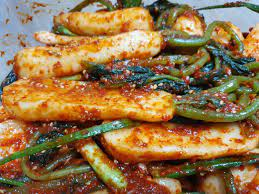
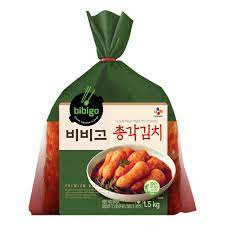
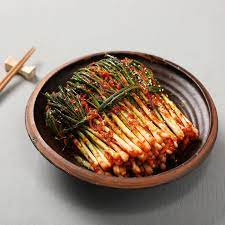
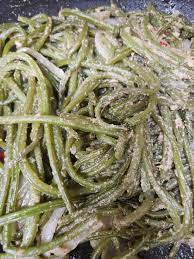
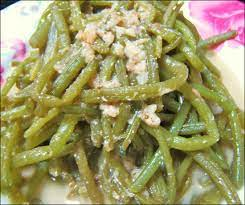
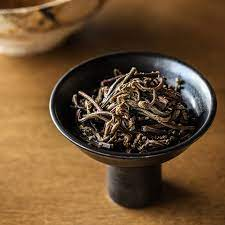
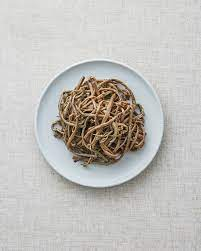
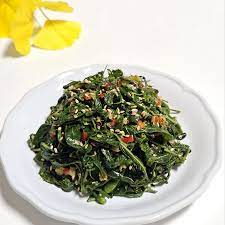
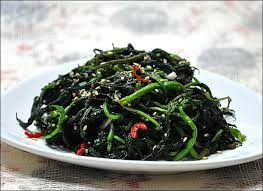
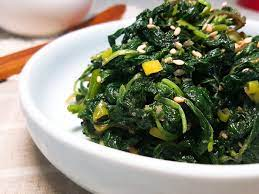
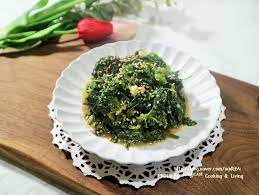
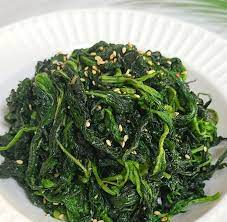
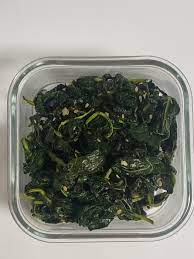
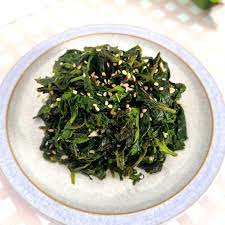
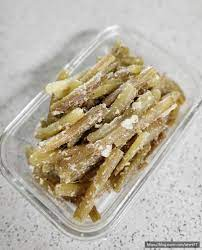
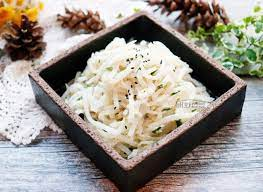
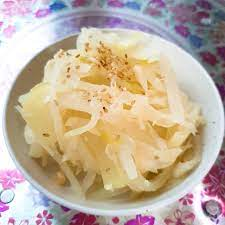
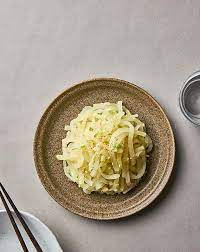
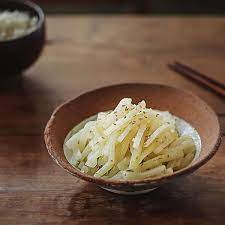
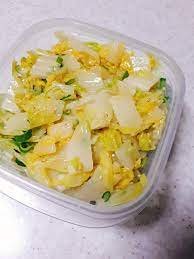
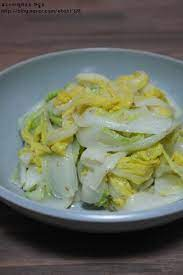
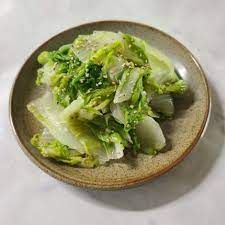
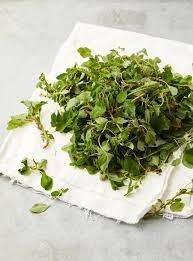
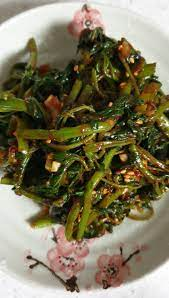
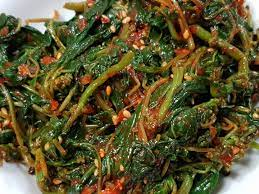
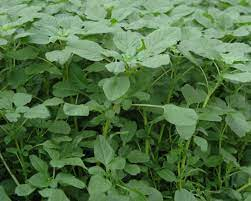
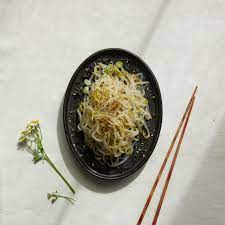
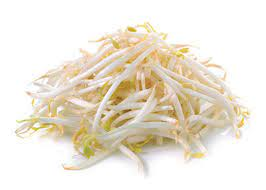
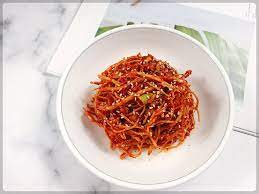
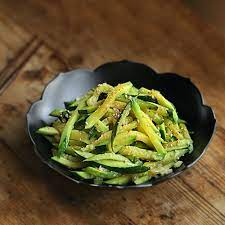
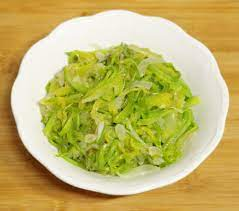
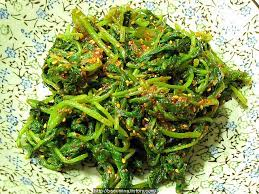
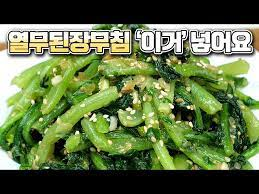
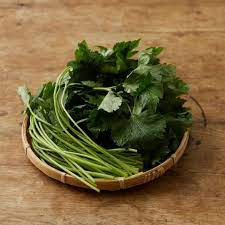
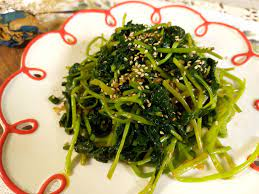
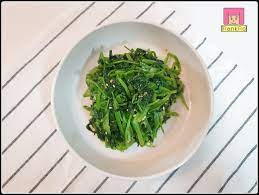
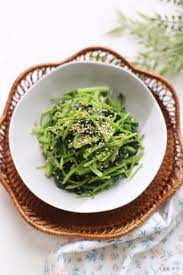
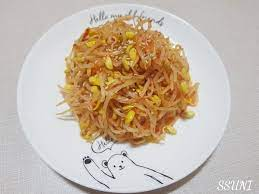
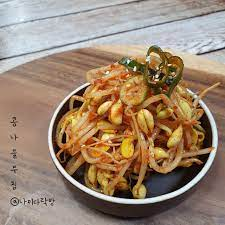
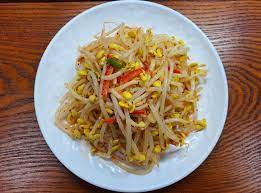
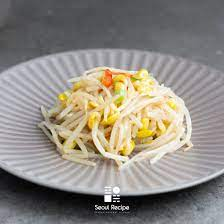
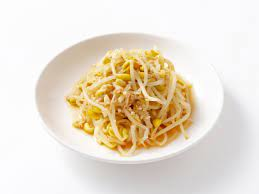
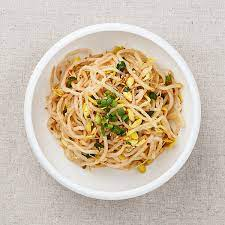
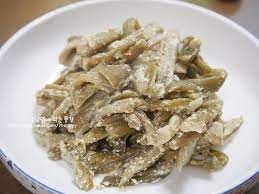
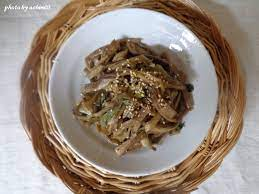
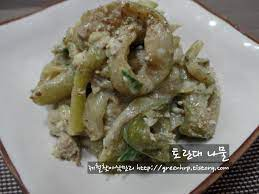
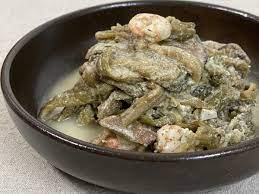
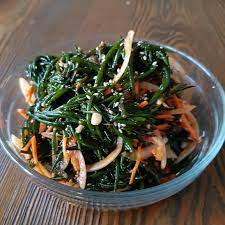
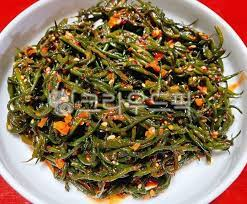
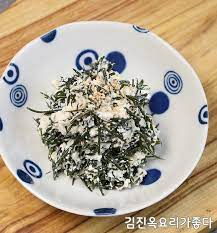
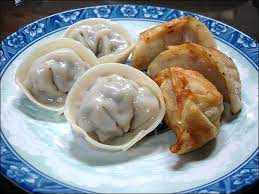
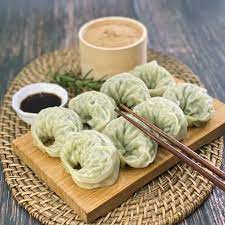
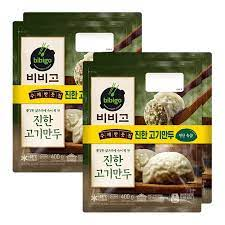
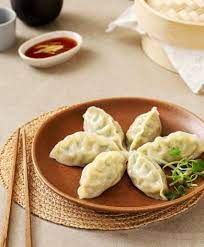
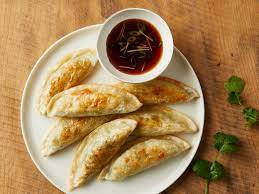
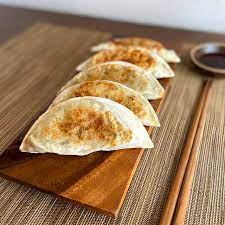
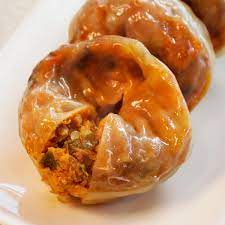
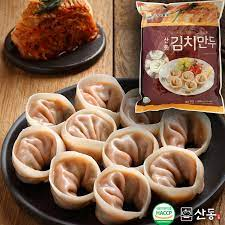
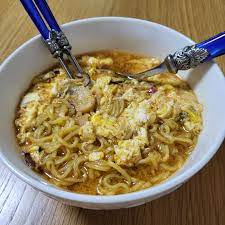
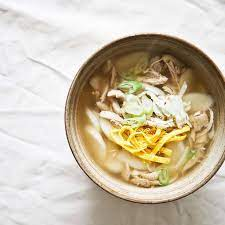
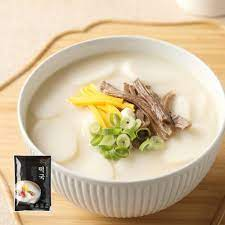
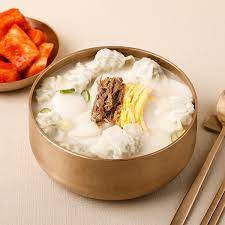
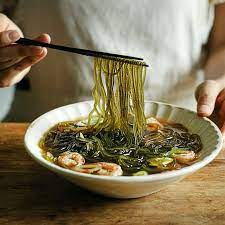
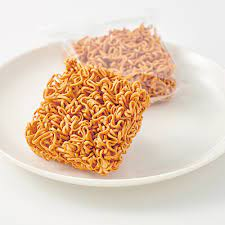
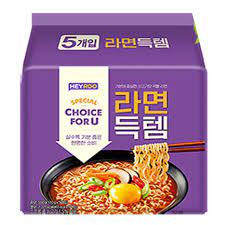
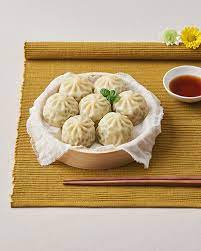
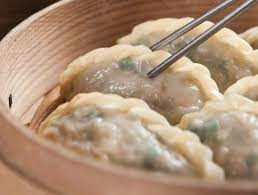
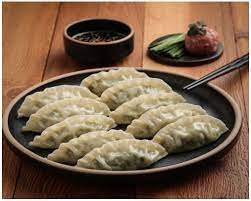
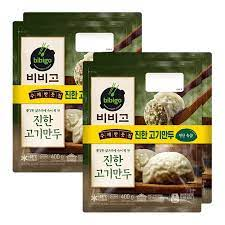
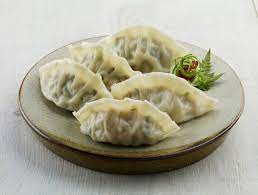
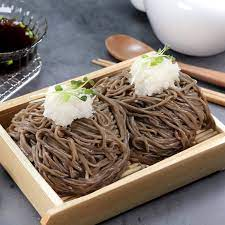
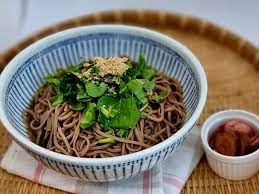
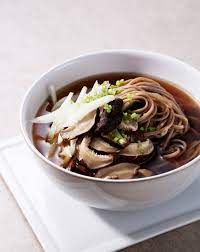
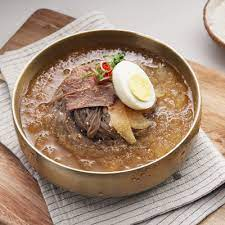
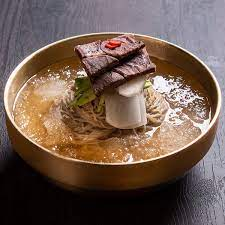
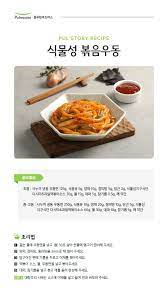
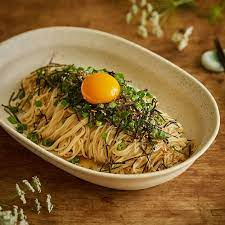
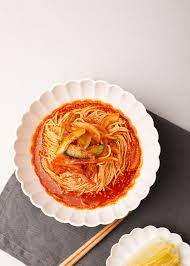
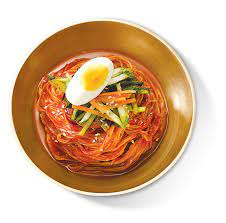
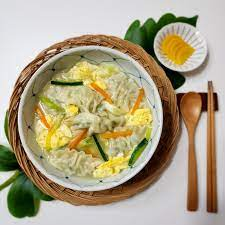
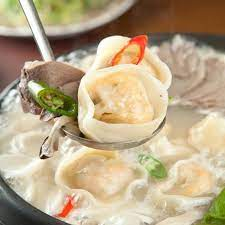
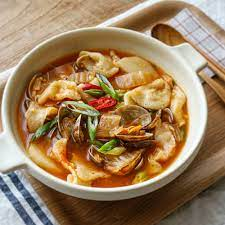
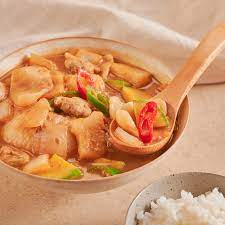
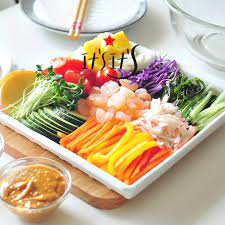
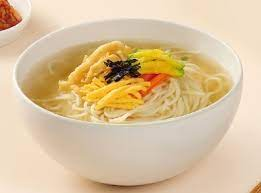
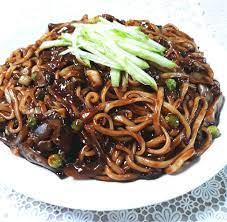
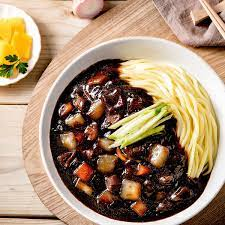
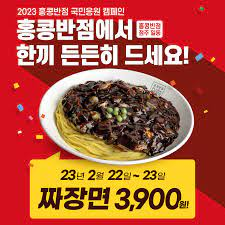
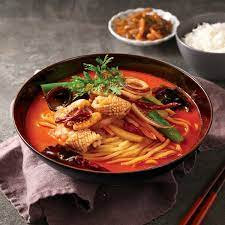
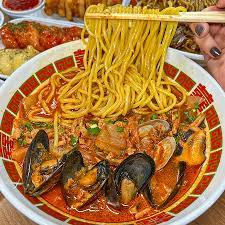
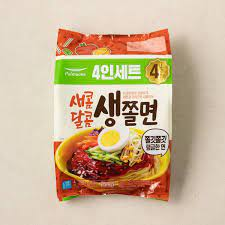
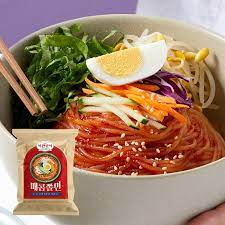
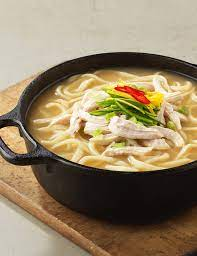
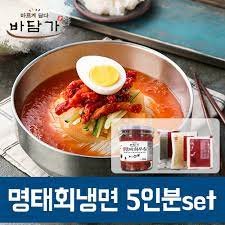
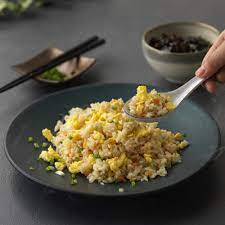
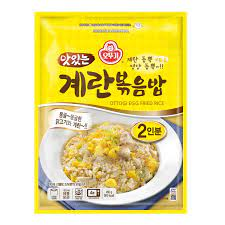
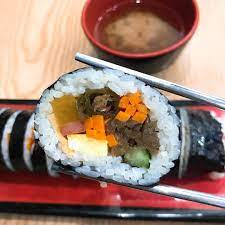
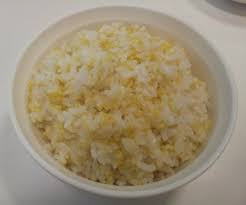
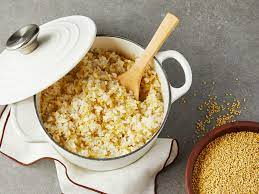
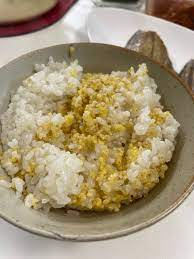
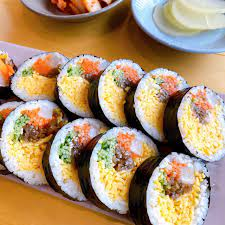
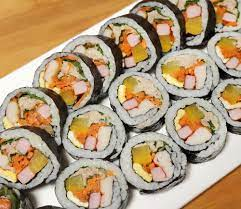
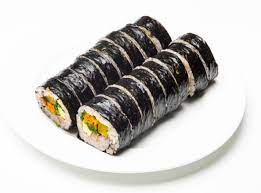
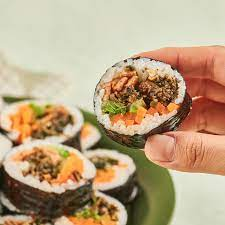
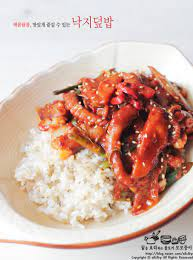
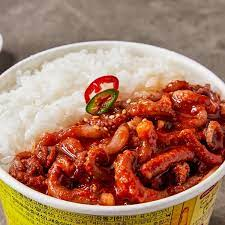
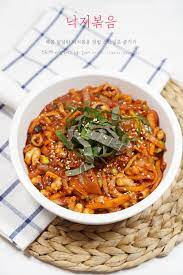
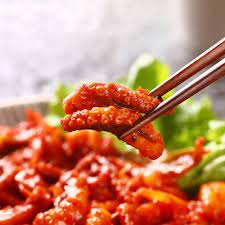
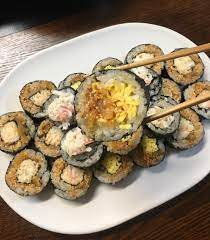
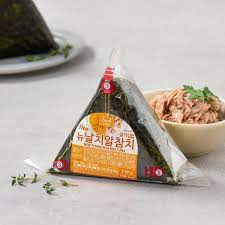
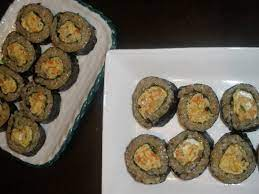
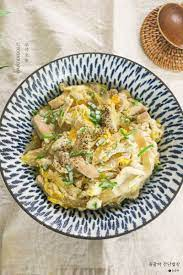
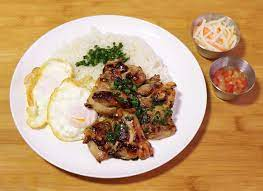
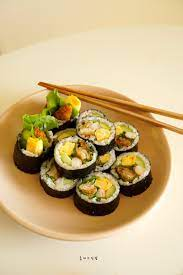
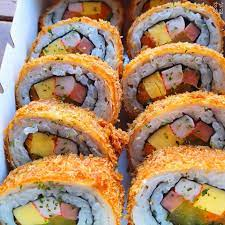
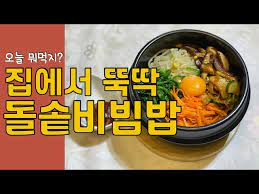
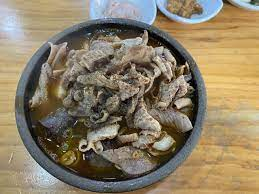
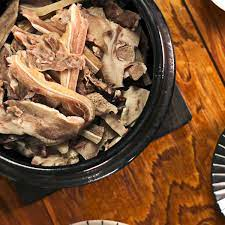
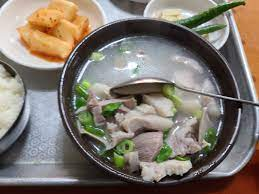
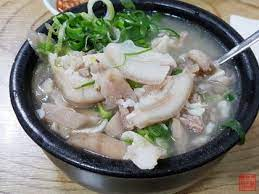
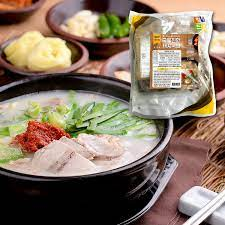
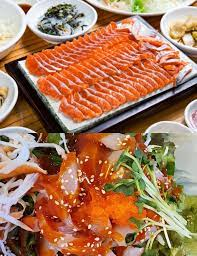
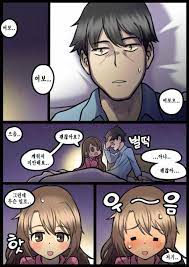
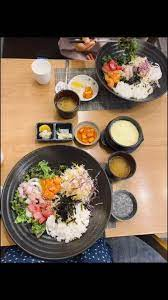
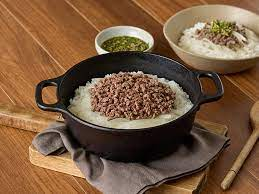
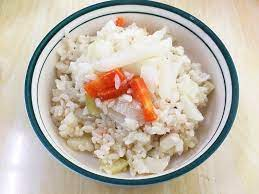
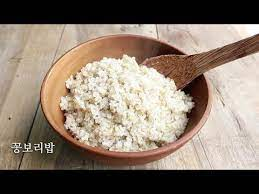
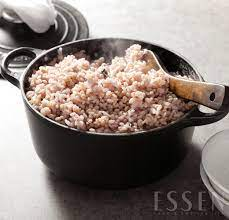
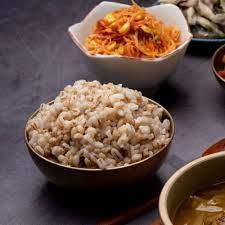
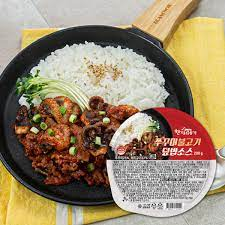
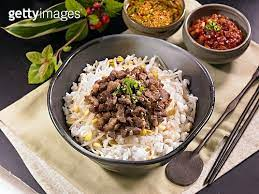
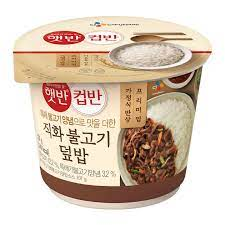
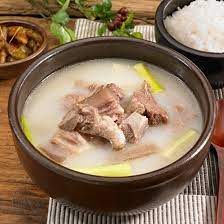
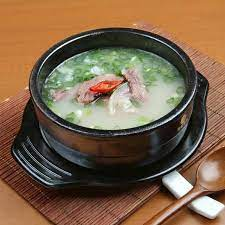
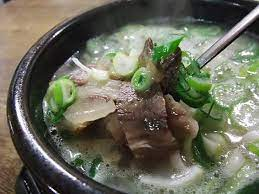
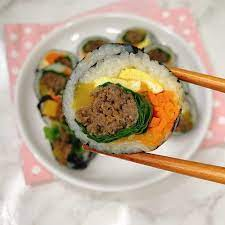
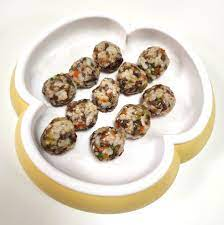
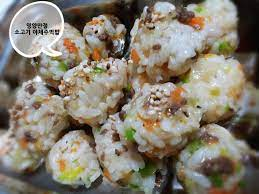
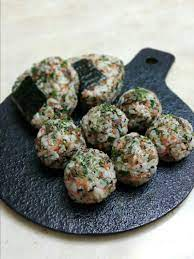
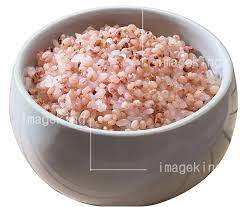
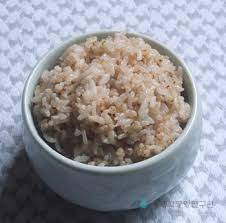
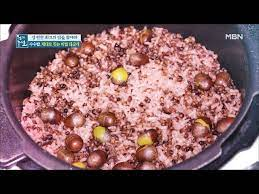
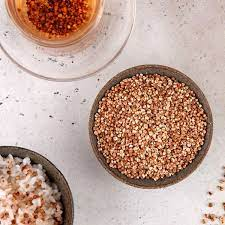
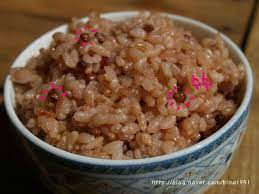
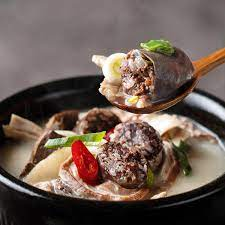
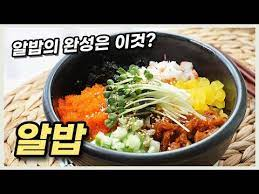
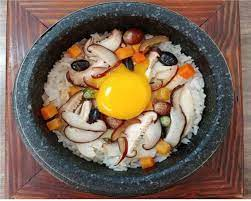
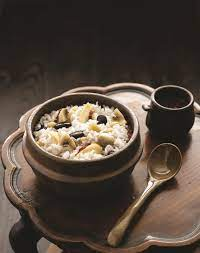
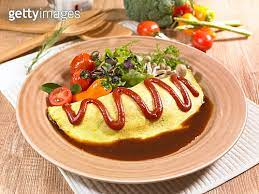
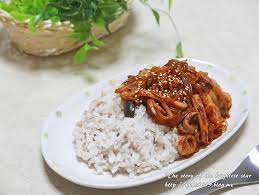
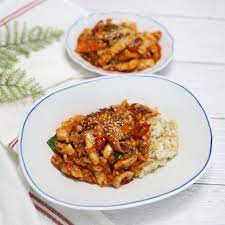
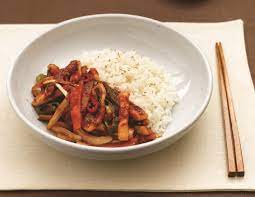
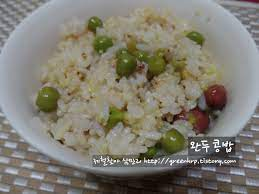
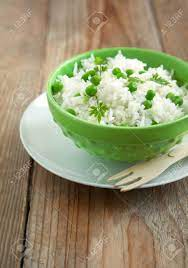
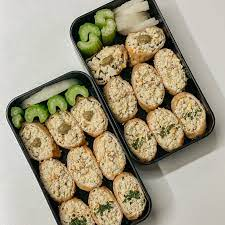
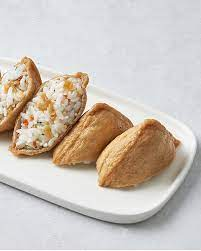
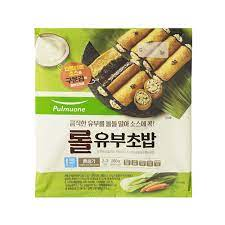
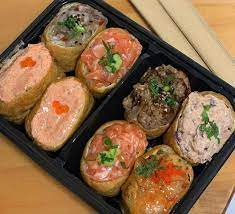
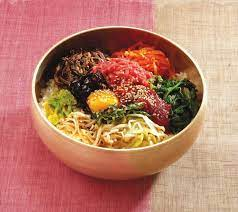
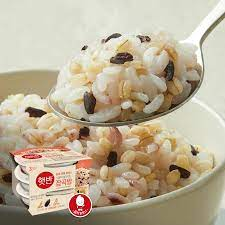
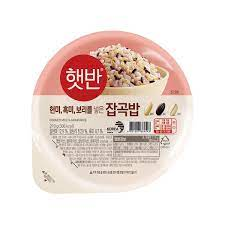
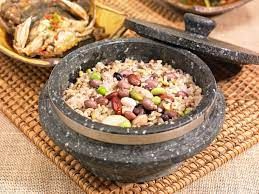
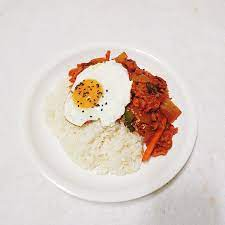
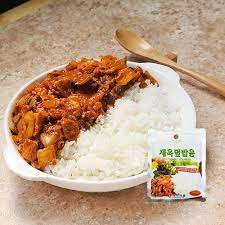
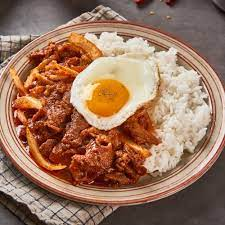
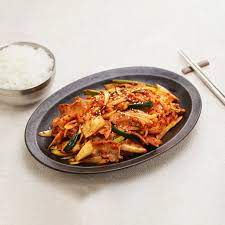
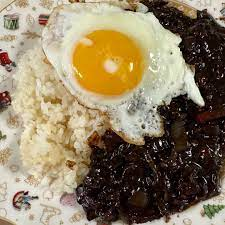
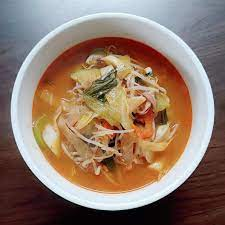
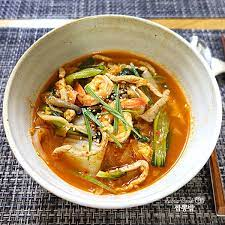
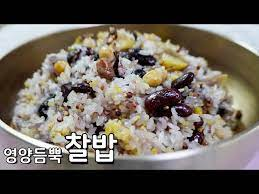
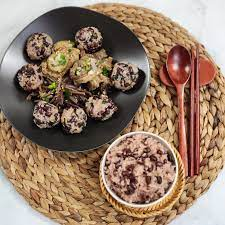
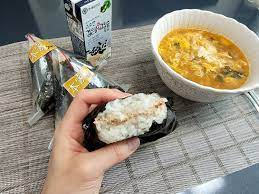
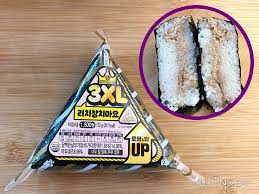
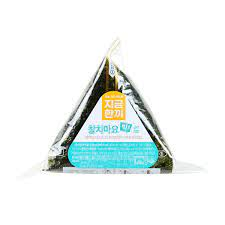
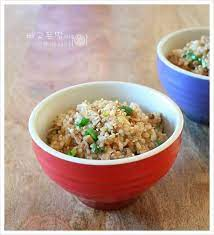
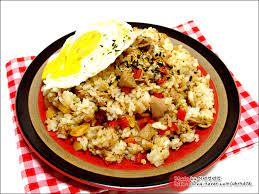
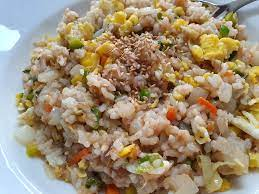
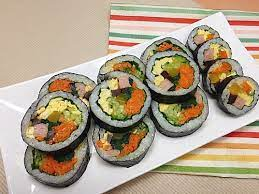
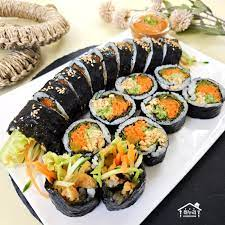
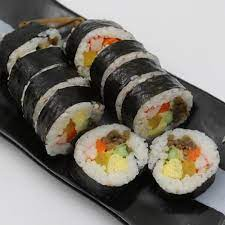
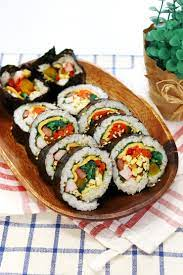
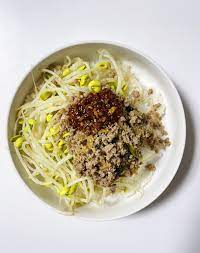
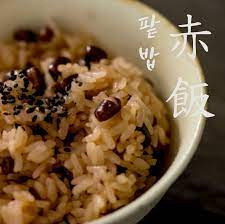
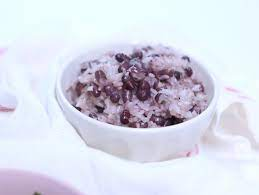
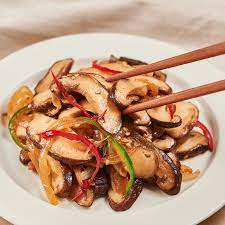
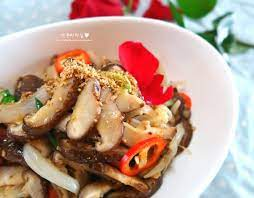
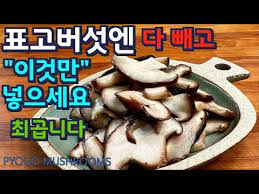
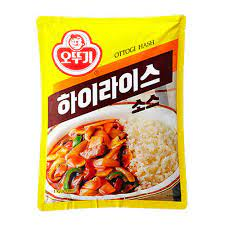
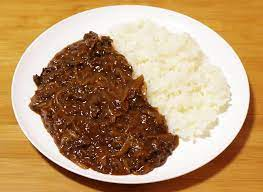
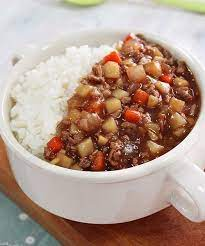
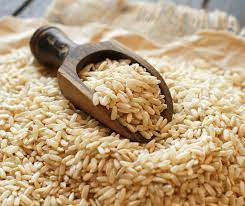
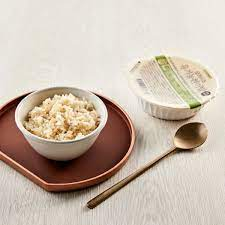
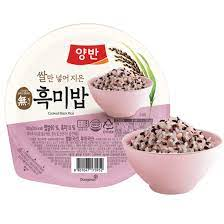
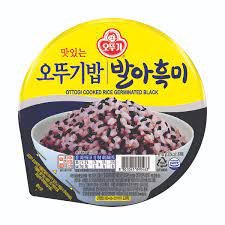
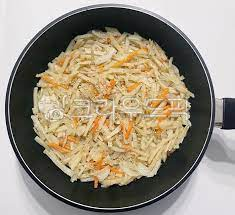
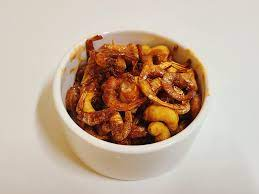
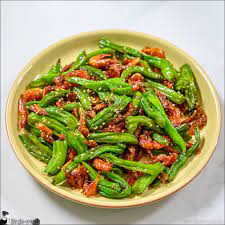
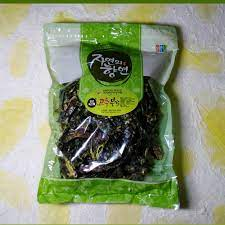
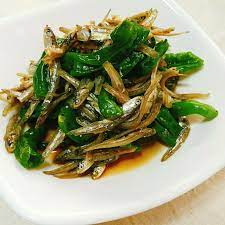
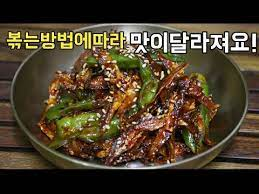
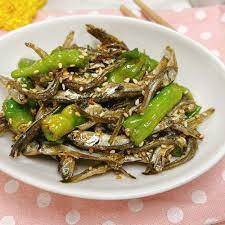
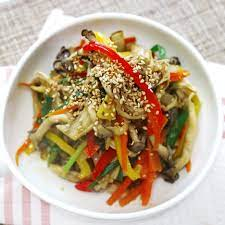
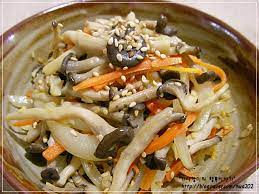
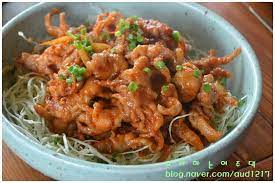
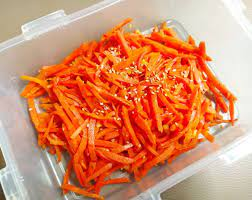
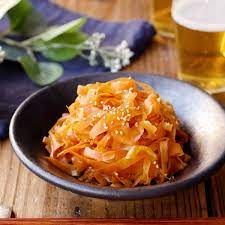
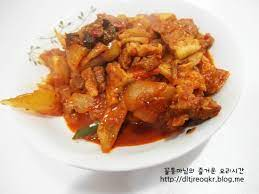
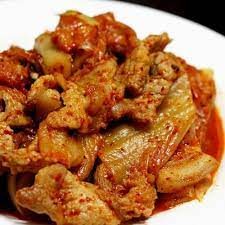
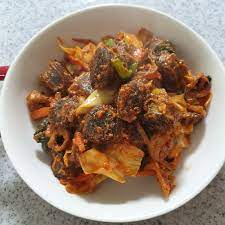
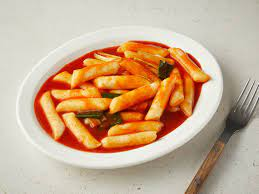
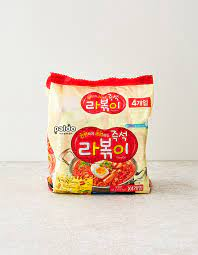
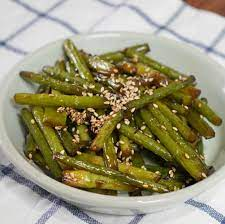
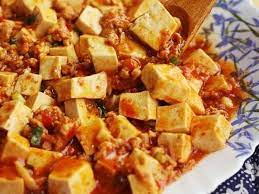
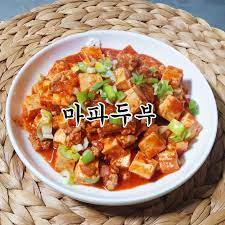
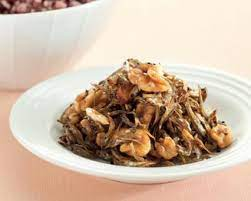
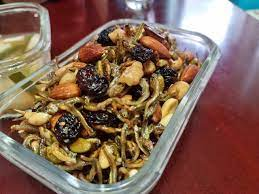
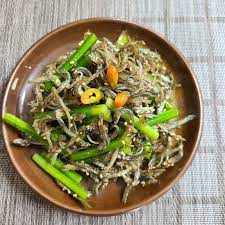
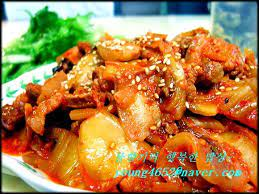
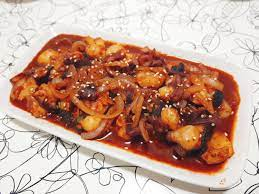
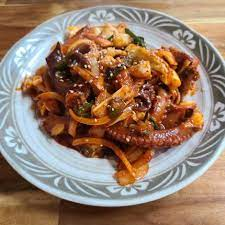
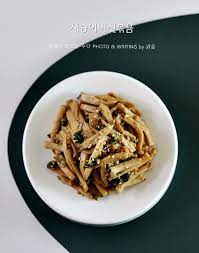
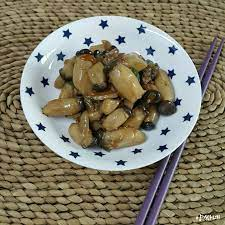
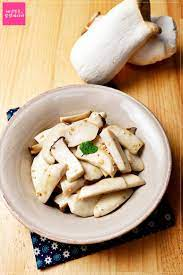
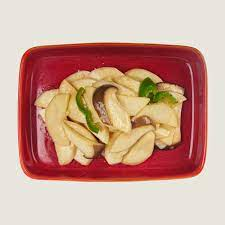
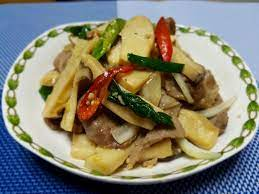
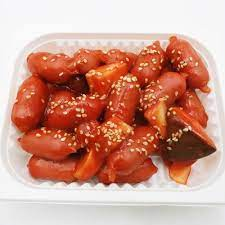
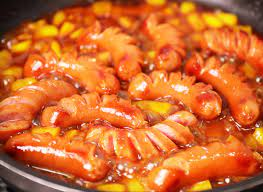
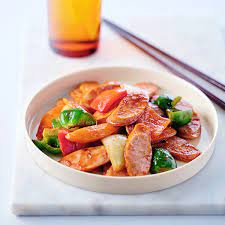
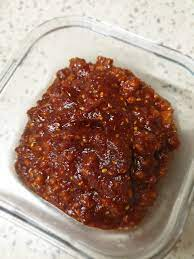
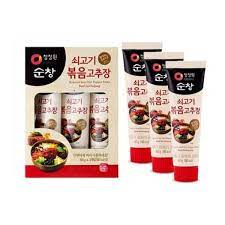
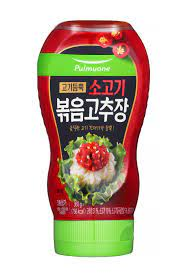
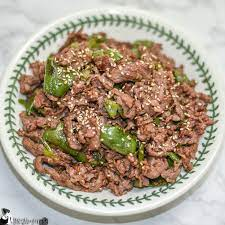
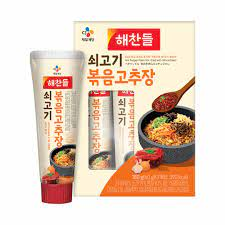
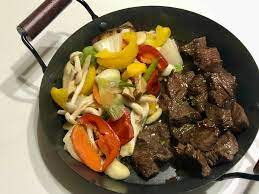
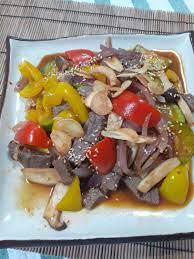
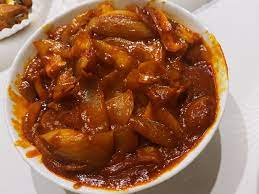
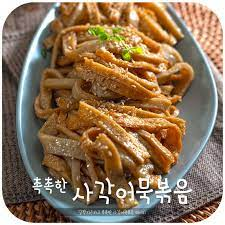
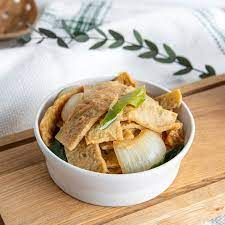
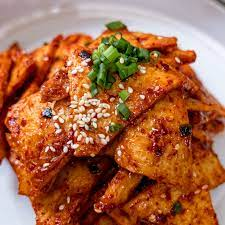
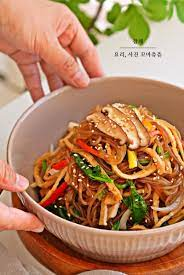
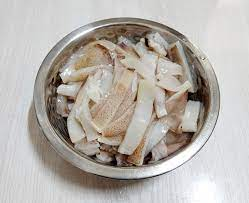
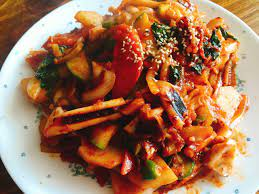
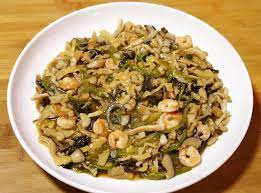
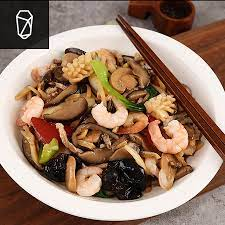
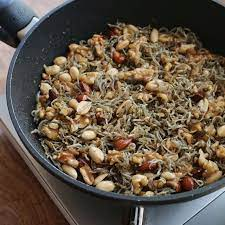
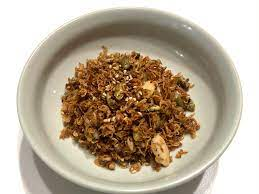
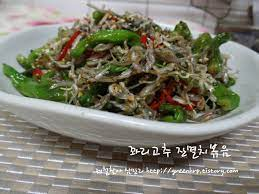
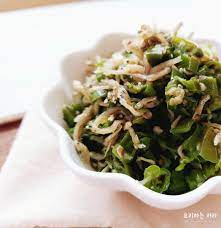
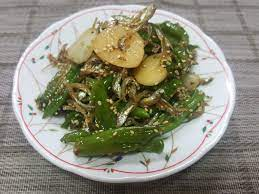
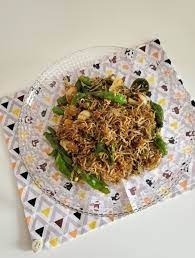
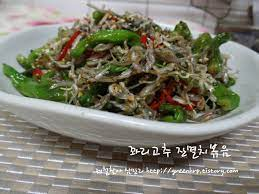
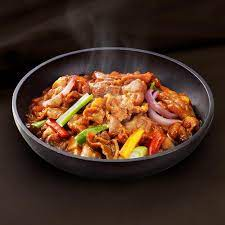
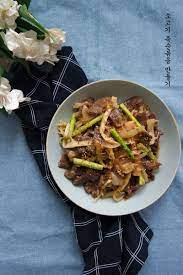
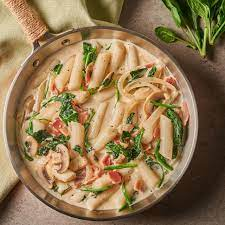
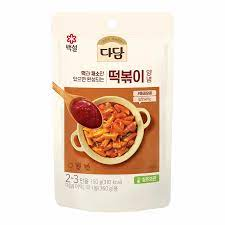
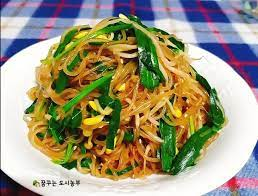
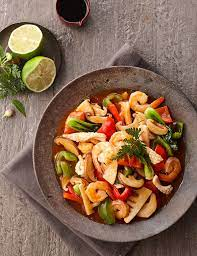
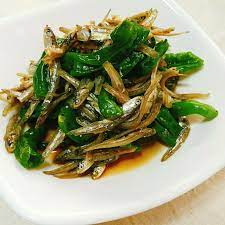
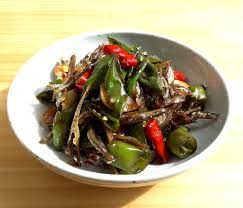
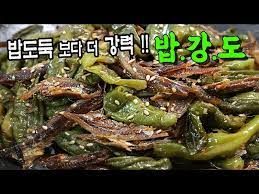
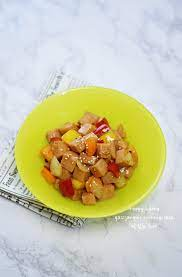
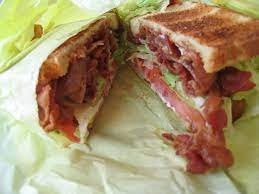
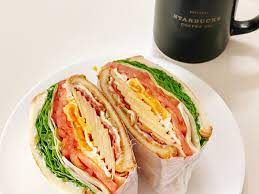
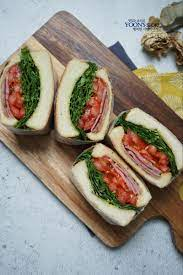
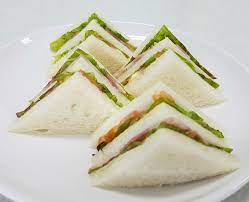
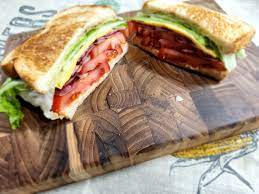
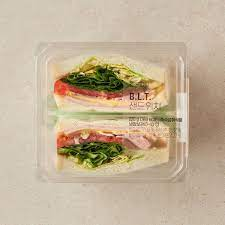
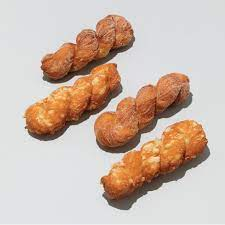
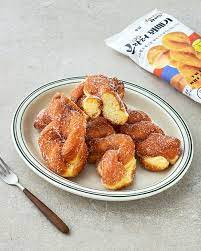
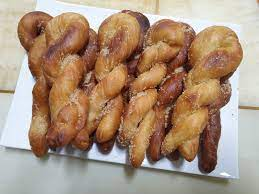
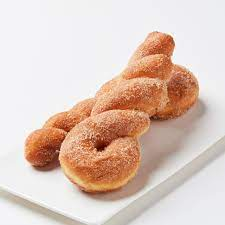
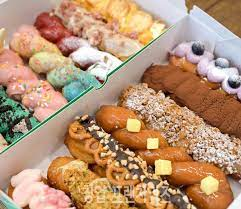
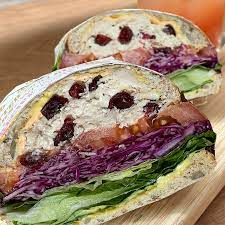
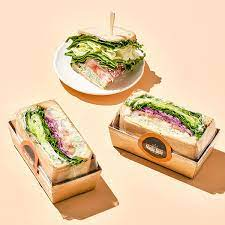
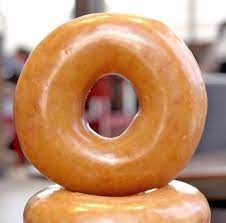
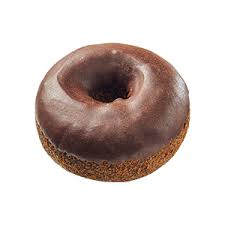
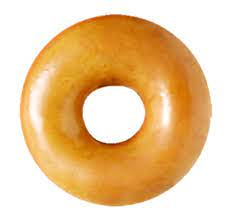
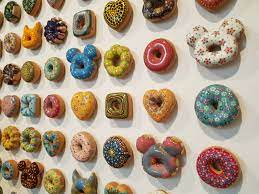
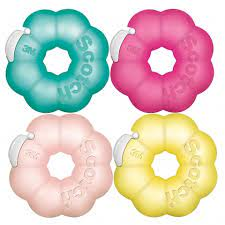
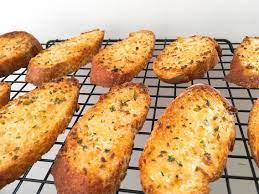
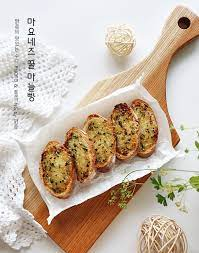
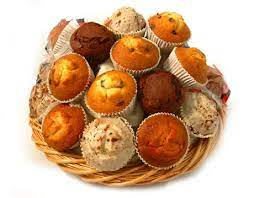
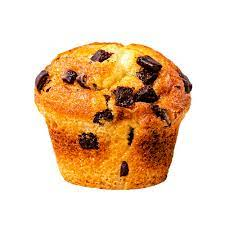
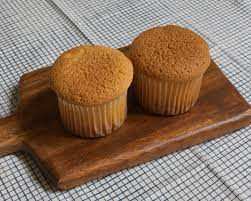
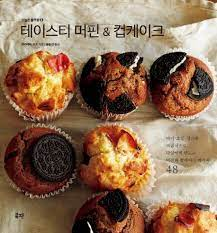
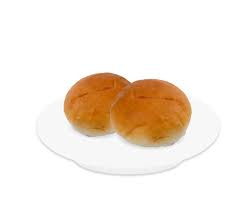
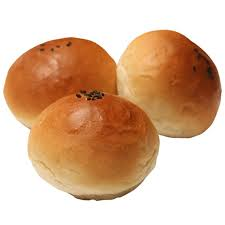
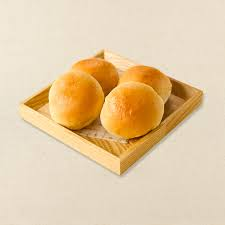
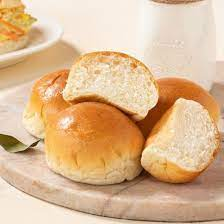
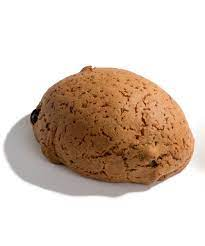
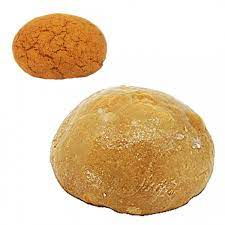
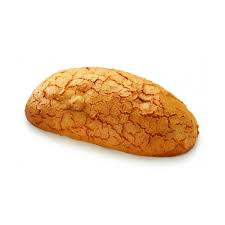
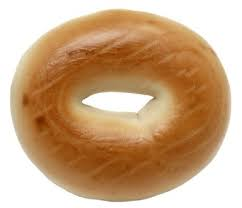
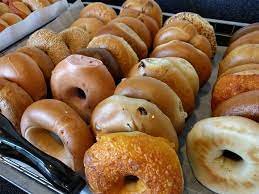
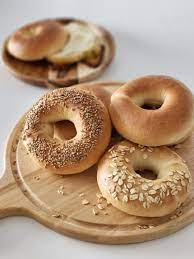
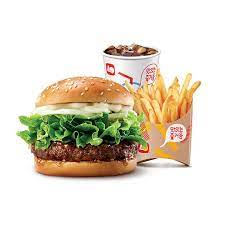
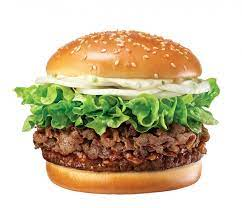
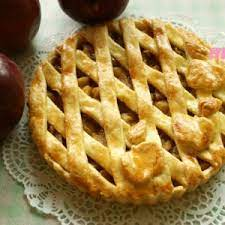
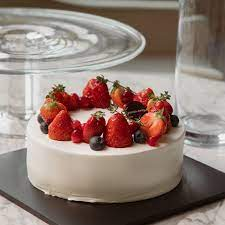
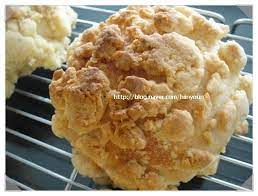
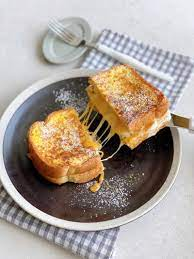
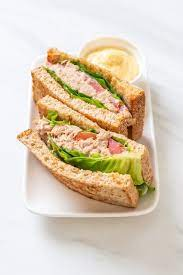
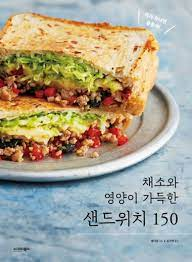
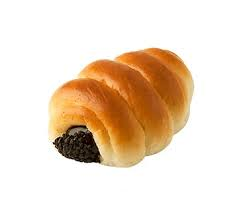
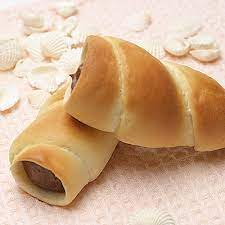
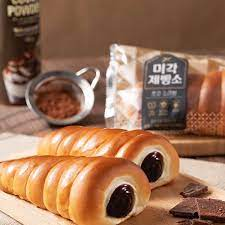

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request
import pandas as pd
import csv

train = pd.read_csv("./filteredDB.csv", encoding='utf-8')
all_searchKey = train['식품명'].tolist()
#all_searchKey = all_searchKey[0:200]
#all_searchKey = all_searchKey[200:400]
all_searchKey = all_searchKey[400:600]
#all_searchKey = all_searchKey[600:]

data = []
for searchKey in all_searchKey:
    driver = webdriver.Chrome()
    driver.get(f"https://www.google.com/search?q={searchKey}&sca_esv=600400644&tbm=isch&sxsrf=ACQVn0_L8Ma9W_3dbeZT11Irfl13ZGT7DQ:1705924331577&source=lnms&sa=X&ved=2ahUKEwiIiLCu9_CDAxWKc_UHHXNUApUQ_AUoA3oECAIQBQ&biw=1536&bih=695&dpr=1.25")
    SCROLL_PAUSE_TIME = 1
    last_height = driver.execute_script("return document.body.scrollHeight")
    image_counter = 0
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            try:
                driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
            except:
                break
        last_height = new_height
    images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
    count = 1
    for image in images:
        try:
            image.click()
            time.sleep(1)  # 이미지 클릭 후 대기
            # Find the image element
            img_element = driver.find_element(By.CSS_SELECTOR, ".sFlh5c.pT0Scc.iPVvYb")
            imgUrl = img_element.get_attribute("src")
            print(imgUrl)
            opener = urllib.request.build_opener()
            opener.addheaders = [
                ('User-Agent',
                'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
            ]
            urllib.request.install_opener(opener)
            urllib.request.urlretrieve(imgUrl, f'./img/{searchKey}{str(count)}.jpg')
            data.append({'FoodName': searchKey, 'ImageURL': imgUrl})
            count = count + 1
            image_counter += 1
            if image_counter == 20:  # 여기를 수정시 사진 가져오는 숫자 조절, 구글 이미지 로딩 더보기를 해야 300장 이런식 가능
                break
        except Exception as e:
            print('Error: ', e)
            pass
    driver.close()

csv_file_path = 'Food_data.csv'
csv_columns = ['FoodName', 'ImageURL']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
    writer.writeheader()
    for row in data:
        writer.writerow(row)

print("Download and CSV file creation complete.")